In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_df = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

house_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [4]:
house_df = pd.concat([house_df, pd.get_dummies(house_df.neighborhood, prefix="neighborhood", drop_first=True)], axis=1)

house_df = pd.concat([house_df, pd.get_dummies(house_df.housestyle, prefix="housestyle", drop_first=True)], axis=1)

dummy_column_names = list(pd.get_dummies(house_df.neighborhood, prefix="neighborhood", drop_first=True).columns)

dummy_column_names = list(pd.get_dummies(house_df.housestyle, prefix="housestyle", drop_first=True).columns)

In [5]:
Y = house_df["saleprice"]
X = house_df[["overallqual", "firstflrsf", "garagecars", "totalbsmtsf", "grlivarea"]]

X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()

results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     928.8
Date:                Wed, 05 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:08:09   Log-Likelihood:                -17497.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1454   BIC:                         3.504e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -1.03e+05   4901.609    -21.006      0.000   -1.13e+05   -9.33e+04
overallqual  2.396e+04   1083.493     22.109      0.000    2.18e+04    2.61e+04
firstflrsf     11.6608      5.024      2.321      0.020       1.805      21.516
garagecars   1.819e+04   1752.914     10.377      0.000    1.48e+04    2.16e+04
totalbsmtsf    25.0167      4.299      5.819      0.000      16.583      33.450
grlivarea      43.2993      2.678     16.170      0.000      38.047      48.552
==============================================================================
Omnibus:                      417.210   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35788.405
Skew:                          -0.254   Prob(JB):                         0.00
Kurtosis:                      27.250   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

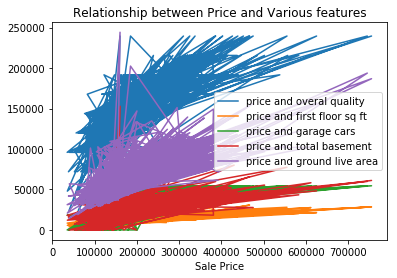

In [10]:

price_overallqual = house_df.overallqual * 23960
price_firstflrsf = house_df.firstflrsf * 11.6608
price_garagecars = house_df.garagecars *18190
price_totalbsmtsf = house_df.totalbsmtsf * 25.0167
price_grlivarea = house_df.grlivarea * 43.2993

plt.plot(house_df.saleprice, price_overallqual)
plt.plot(house_df.saleprice, price_firstflrsf)
plt.plot(house_df.saleprice, price_garagecars)
plt.plot(house_df.saleprice, price_totalbsmtsf)
plt.plot(house_df.saleprice, price_grlivarea)

plt.legend(["price and overal quality","price and first floor sq ft","price and garage cars","price and total basement",
           "price and ground live area"])
plt.xlabel("Sale Price")
plt.title("Relationship between Price and Various features")

plt.show()

It appears that only two features are not statisitically significant. These are the "housestyle_1.5Unf" and "housestyle_2Story" which both have a p-value greater than .1. 

I removed all of the housestyle features and now all of the features are statistically significant. After removing the nonsignificant features, the remaining features coefficients changed. First floor sq footage changed to a positive variable, and several of the others increased in value.

As you can see from the visual, the overall quality has the largest impact on sales price. Overall quality seems to make the most sense, but most real estate transactions are based on square footage. Maybe because they break up the square footage into different levels it is not have the same effect as it would if it were all one number.


